# R LAB GRADED ASSIGNMENT 1
## MSc in Business Analytics<br>
Athens University of Business and Economics<br>
Module: Statistics in Business Analytics 1<br>
Assignment created by Professor Stauros Nikolakopoulos(Department of Statistics, AUEB)<br>
Author: Ferdinand Tzimas


The data to be used for this assignment will be scraped from https://www.metacritic.com. You will have to manipulate data from film reviews (both critics- and public-based). Critics reviews (from Washington Post) are described in the critic variable while public reviews in the metascore variable.

In [1]:
library(robotstxt)
library(rvest)

# This code scrapes 27 pages from a website about movie reviews and creates a dataframe with each row corresponding to a movie reviewed.
#After the assembly of the data in the df.tot dataframe we perform several actions based on descriptive statistics such as finding aggregate and derived data from the original data and performing data visualization in order to extract information about the movie reviews.


paths_allowed("https://www.metacritic.com/publication/washington-post?filter=movies&num_items=100&sort_options=date&page=0")

main.page <- "https://www.metacritic.com/publication/washington-post?filter=movies&num_items=100&sort_options=date&page="

for (i in 0:27){
                # at each iteration the variable step.page takes the value of main.page concatenated with the page number corresponding to that iteration so that each separate page of the website can be reached and scraped through the link fed to the variable step.page
                step.page <- paste(main.page,i,sep="") 
                webdata <-read_html(step.page) 
                #Vector title is created containing the titles of all movies of the page that corresponds to that particular iteration 
                title <-c(webdata %>% html_nodes("div.review_product") %>% html_nodes("a") %>%html_text()) 
                #Vector metascore is created which includes the metascores of all movies of the page that correspond to that particular iteration
                metascore <- c(webdata %>% html_nodes("li.review_product_score.brief_metascore") %>%html_nodes("span.metascore_w") %>% html_text()) 
                #Vector critic is created which includes the critic's scores of all movies of the page that corresponds to that particular iteration
                critic <- c(webdata %>% html_nodes("li.review_product_score.brief_critscore") %>%html_nodes("span.metascore_w") %>% html_text())
                #Vector date is created which includes the dates of the review of all movies of the page that corresponds to that particular iteration
                date <- c(webdata %>% html_nodes("li.review_action.post_date") %>% html_text())  
                if (length(date)<100 ){for (j in length(date):100){ date[j] <- date[length(date)]}}  
                #isolates into vector a the day number from the strings-values of the date vector
                a <- substr(date,12,13)
                #isolates into vector b the month from the same strings-values of the date vector
                b <- substr(date,8,10) 
                #isolates into vactor d the year from the same strings-values of the date vector
                d <- substr(date,16,19) 
                lct<- Sys.getlocale("LC_TIME"); Sys.setlocale("LC_TIME", "C") 
                #concatenates the isolated day, month and year from a,b,d in a single string separated by / for all corresponding strings of the three same size vectors
                date2 <- apply(cbind(a,b,d),1,paste,collapse="/") 
                #turns date2 vector to date type(year-month-day)
                date3 <- as.Date(date2,"%d/%b/%Y") 
                Sys.setlocale("LC_TIME", lct) #OK
                #creates a dataframe containing the titles,metascores,critic scores and dates for all movies scraped from that webpage
                df = data.frame(title,metascore,critic,date3) 
                #gives names to the dataframe columns
                colnames(df) <- c("title", "metascore", "critic","date") 
                #sets metascore column values at first as character type then as numeric
                df$metascore <- as.numeric(as.character(df$metascore)) 
                #sets critic column values at first as character type then as numeric
                df$critic <- as.numeric(as.character(df$critic)) 
                #keeps only the rows that have no missing values
                df <- df[complete.cases(df), ] 
                if (i==0){ #OK
                   df.tot <- df} 
                #for every iteration after the first... 
                if (i>0){ #?
                  #the dataframe created, having all movies for that webpage, is merged by row with all other dataframes that were created and assigned to the variable df in all previous iterations.
                   df.tot <- rbind(df.tot,df) } 
}
#Ensures that the values of the title column of df.tot are in character form.
df.tot$title <-as.character(df.tot$title)   

 www.metacritic.com                      





[1] TRUE

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(e

Provide a short description of the data

In [2]:
str(df.tot)

'data.frame':	2775 obs. of  4 variables:
 $ title    : chr  "The Souvenir: Part II" "Clifford the Big Red Dog" "Eternals" "Spencer" ...
 $ metascore: num  89 56 52 77 83 57 65 62 75 74 ...
 $ critic   : num  63 50 50 75 63 75 63 37 63 50 ...
 $ date     : Date, format: "2021-11-09" "2021-11-09" ...


Create three new variables that are directly included in the data frame (assign them directly as
variables of the df.tot data frame).These variables should describe:

 The ratio of public score / critics score for each movie (ratio)
 The percentile of each metascore value (perc.meta) 
 The percentile of each critic value (perc.critic)
 The year each film was reviewed (year)

In [3]:
df.tot$ratio=df.tot$metascore/df.tot$critic
df.tot$perc.meta=round((rank(df.tot$metascore)/length(df.tot$metascore)),digits=2)
df.tot$perc.critic=round((rank(df.tot$critic)/length(df.tot$critic)),digits=2)
df.tot$year <- as.numeric(format(df.tot$date, "%Y"))

Which film has the highest metascore score?

In [4]:
df.tot$title[which(df.tot$metascore==max(df.tot$metascore))]
#Huh! Its "Boyhood"...

[1] "Boyhood"

Produce a boxplot of the perc.meta variable, for (faceted by) each year observed in the dataset (in
the same plot window). Draw a vertical line at y=0.5 and discuss the result.

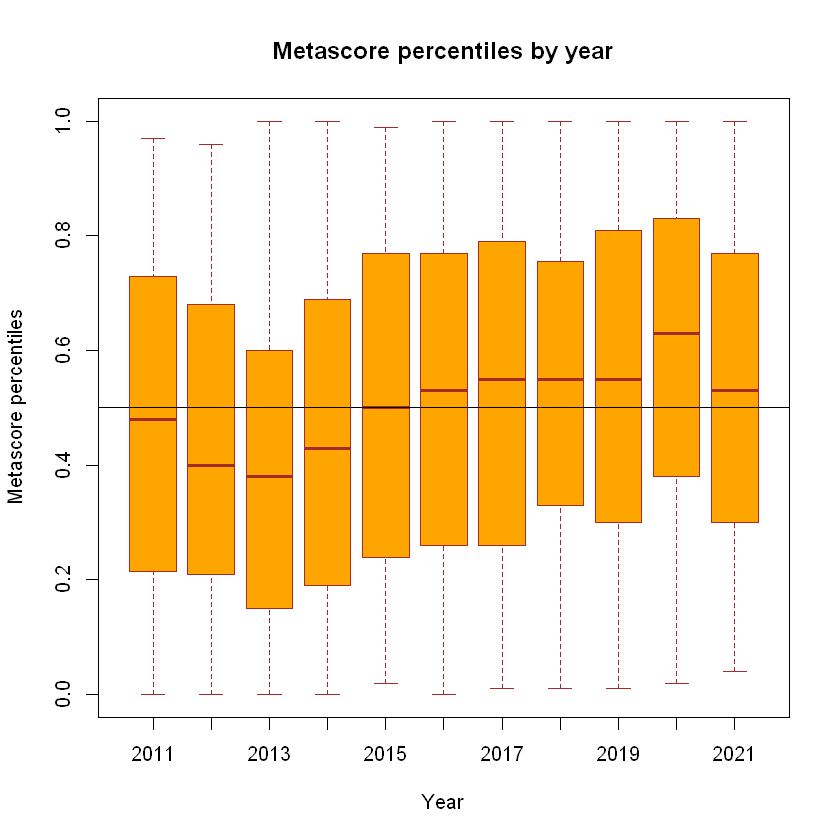

In [5]:
boxplot(df.tot$perc.meta~df.tot$year,data=df.tot,main="Metascore percentiles by year",xlab="Year",ylab="Metascore percentiles",col="orange",border="brown")
abline(a=0.5,b=0)
#WE NOTICE THAT THE MAJORITY OF VALUES AFTER 2015 ARE ABOVE THE 50 PERCENTILE OF ALL MOVIE METASCORES IN THE DATASET. BASICALLY, THEY GIVE MOVIES HIGHER SCORES AS OF LATELY.

Some of the ratio values are infinity. Explain why this is happening and create a new data frame,
named df.tot2, which does not include these observations


In [6]:
which(!is.finite(df.tot$ratio))
#Used above command to see where the problem is.
#Lets see if any critics scored zero
which(df.tot$critic==0)
#By running the two previous commands it is obvious that ratio infinity lies within the rows of the dataframe where the critics scored zeros
df.tot2<-df.tot[df.tot$critic!=0,]
#Lets check
which(!is.finite(df.tot2$ratio))

[1]  291 1261 1427 1495 1630 1760 1944 1996 2068 2396 2675

[1]  291 1261 1427 1495 1630 1760 1944 1996 2068 2396 2675

integer(0)

Work with the df.tot2 data frame. Create a matrix with two columns, one with the metascore and
one with the critic. Calculate a vector that includes the average of the two, by using the apply()
function.

In [8]:
q7matrix <- df.tot2[,c('metascore','critic')]
average<-apply(q7matrix,1,mean)
average

2     3     4     5     6     7     8     9    10    11    12    13    14 
 76.0  53.0  51.0  76.0  73.0  66.0  64.0  49.5  69.0  62.0  71.5  74.5  70.0 
   15    16    17    18    19    20    21    22    23    24    25    26    27 
 71.0  90.5  39.5  78.5  93.0  72.0  71.5  61.5  48.5  55.5  56.5  37.0  57.0 
   28    29    30    31    32    33    34    35    36    37    38    39    40 
 64.0  80.5  55.0  65.0  54.5  62.0  71.0  76.0  62.5  72.5  67.5  35.0  45.5 
   41    42    43    44    45    46    47    48    49    50    51    52    53 
 28.0  54.5  58.5  67.5  57.5  73.0  55.5  67.0  48.0  71.5  83.5  56.5  68.0 
   54    55    56    57    58    59    60    61    62    63    64    65    66 
 87.5  56.0  74.0  67.5  80.5  77.0  52.0  86.5  61.5  50.0  74.5  45.5  43.0 
   67    68    69    70    71    72    73    74    75    76    77    79    80 
 91.0  72.5  83.5  71.0  82.0  51.0  51.5  88.0  98.0  82.0  65.0  64.0  54.0 
   81    82    83    84    85    86    87    88    89    90    91    92    93 
 77.0  77.5  34.5  47.0  79.5  65.0  43.0  58.0  61.5  74.5  54.5  85.5  78.0 
   94    95    96    97    98    99   100     1   210   310   410   510   610 
 75.0  65.5  73.0  64.5  68.5  39.0  52.0  45.0  45.5  53.5  42.0  60.0  71.5 
  710   810   910   101   111   121   131   141   161   171   181   191   201 
 47.5  89.0  57.5  88.5  85.5  81.0  52.0  79.0  50.0  47.0  69.5  65.5  71.0 
  211   221   231   241   251   261   271   281   291   301   311   321   331 
 61.0  63.5  70.0  92.0  53.5  94.0  52.0  50.5  63.5  36.0  81.5  51.0  54.5 
  341   351   361   371   381   391   401   411   421   431   441   451   461 
 39.0  96.5  90.5  92.5  82.0  74.0  68.0  58.0  69.0  51.5  91.0  51.5  86.5 
  471   481   491   501   511   521   531   541   551   561   571   581   591 
 58.5  57.5  74.0  47.0  75.0  80.5  90.5  51.5  75.5  66.5  63.5  79.0  80.5 
  601   611   621   631   641   651   661   671   681   691   701   711   721 
 78.0  80.5  73.0  61.5  50.5  79.0  84.0  65.0  69.0  26.0  67.5  74.0  93.5 
  731   741   751   761   771    78   791   801   811   821   831   841   851 
 75.0  92.0  78.5  53.0  97.5  75.5  72.0  71.0  91.5  59.5  70.5  61.0  58.5 
  861   871   881   891   901   911   921   931   941   951   961   971   981 
 37.5  57.5  88.0  69.0  60.5  71.5  73.0  49.0  41.5  96.5  54.5  77.5  33.0 
  991  1001   110   212   312   412   512   612   712   812   912   102   112 
 35.5  77.5  55.0  82.0  72.5  82.0  89.0  71.5  78.5  77.5  40.0  75.0  47.0 
  122   132   142   151   162   172   182   192   202   213   222   232   242 
 70.5  88.5  90.0  65.0  62.0  50.5  86.0  65.0  71.5  85.5  80.5  39.5  67.5 
  252   262   272   282   292   302   313   322   332   342   352   362   372 
 53.0  73.5  72.5  73.0  82.5  79.5  95.0  55.0  50.0  76.0  66.5  78.5  71.0 
  382   392   402   413   422   432   442   452   462   472   482   492   502 
 75.5  60.5  92.0  78.5  53.5  72.0  80.5  68.0  81.0  81.0  79.5  74.5  85.5 
  513   522   532   542   552   562   572   582   592   602   613   622   632 
 72.0  72.0  96.0  78.5  88.0  73.5  58.5  45.5  70.0  94.5  37.5  40.5  79.0 
  642   652   662   672   682   692   702   713   722   732   742   752   762 
 60.0  60.0  61.0  68.0  88.5  54.0  44.5  52.5  54.5  84.5  73.0  68.0  63.5 
  772   781   792   802   813   822   832   842   852   862   872   882   892 
 71.5  79.5  79.0  48.5  61.0  56.0  71.5  85.0  67.0  77.0  69.5  41.0  45.5 
  902   913   922   932   952   962   972   982   992  1002   113   214   314 
 66.5  50.5  57.0  61.0  83.0  73.5  35.0  76.0  78.0  78.0  73.0  44.0  76.5 
  414   514   614   714   814   914   103   114   123   133   143   152   163 
 89.5  41.0  89.5  51.5  64.5  69.5  70.5  89.5  54.0  75.5  94.5  65.5  75.0 
  173   183   193   203   215   223   233   243   253   263   273   283   293 
 75.0  67.5  48.5  68.0  55.5  61.5  78.5  74.5  90.0  57.0  90.0  57.0  86.0 
  303   315   323   333   343   353   363   373   383 

Work with the df.tot2 data frame. Create a scatterplot with date on the x-axis and perc.meta on
the y-axis. Main title should be "Metascores percentiles" and the axes named accordingly. Colour
the dots according to whether the observation has a metascore>50 or not. Add a vertical dashed
line for metascore=50. Make the y-axis labels to be perpendicular to the axis.

[1] 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22
[16] 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22
[31] 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22

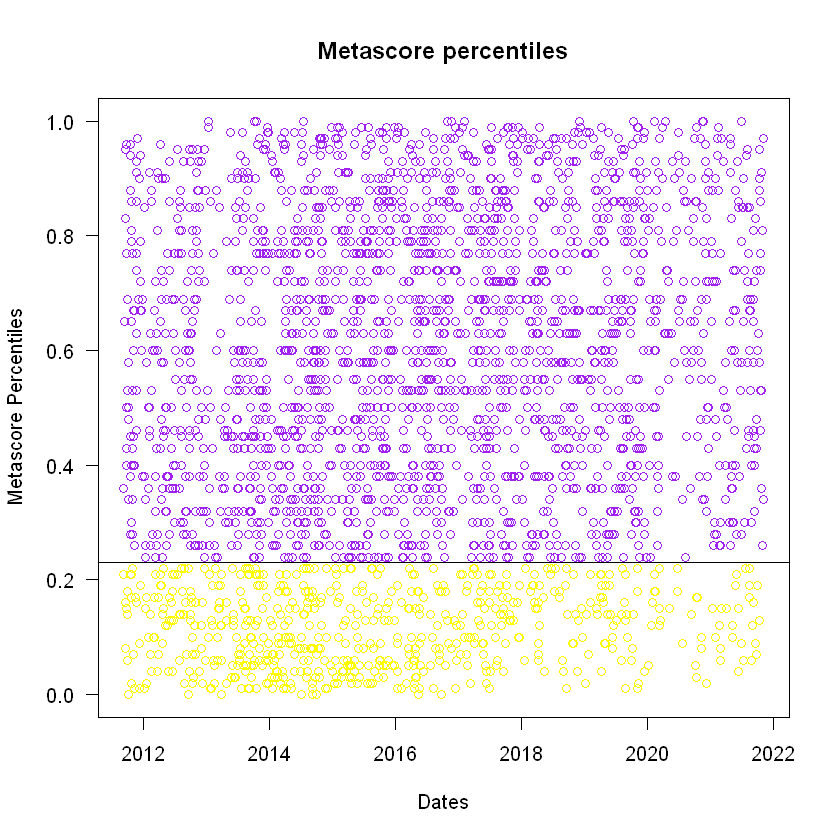

In [9]:
x <- df.tot2$date
y <- df.tot2$perc.meta
df.tot2$perc.meta[df.tot2$metascore==50]
#23 percentile corresponds to metascore equal to 50
plot(x,y,main='Metascore percentiles',xlab = 'Dates',ylab = 'Metascore Percentiles',las=1,col=ifelse(y>0.23,"purple","yellow"))
abline(a=0.23,b=0)

Comment on the above graph, taking into account the possible range of values for metascore (0-100)

In [10]:
#As we can see from the scatterplot a metascore of 50 corresponds to 23 percentile meaning that 77 percent of all movies from the dataframe received metascores over 5 out of 10.
#We also see that there more dots corresponding to metascores below 50 for the years prior to 2016. From 2016 and onward, we see more movies scoring above 50 compared to the period 2012-2015.
